# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [3]:
# Import libraries
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# Your code here
data=pd.read_csv('data_all.zip')
dat=data.copy() ##this is for the training

In [5]:
data.shape

(116322, 785)

In [6]:
data

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116317,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116318,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116319,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
##the e stands for the label, and the other columns are the values of the pixels, each row represents an image
##we know there´s numbers, lower and upper case letters 

In [8]:
e_c=data.e.unique()

In [9]:
len(e_c)
##Now we know we have 62 photos

62

In [10]:
df_np=data.to_numpy()
df_np

array([[36.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 3.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [28.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 5.,  0.,  0., ...,  0.,  0.,  0.]])

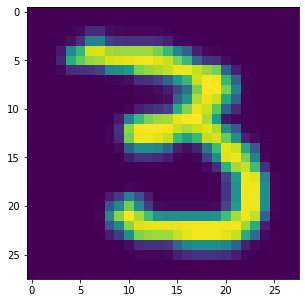

In [11]:
plt.figure(figsize=(5,5))
plt.imshow(df_np[2,1:].reshape(28,28));

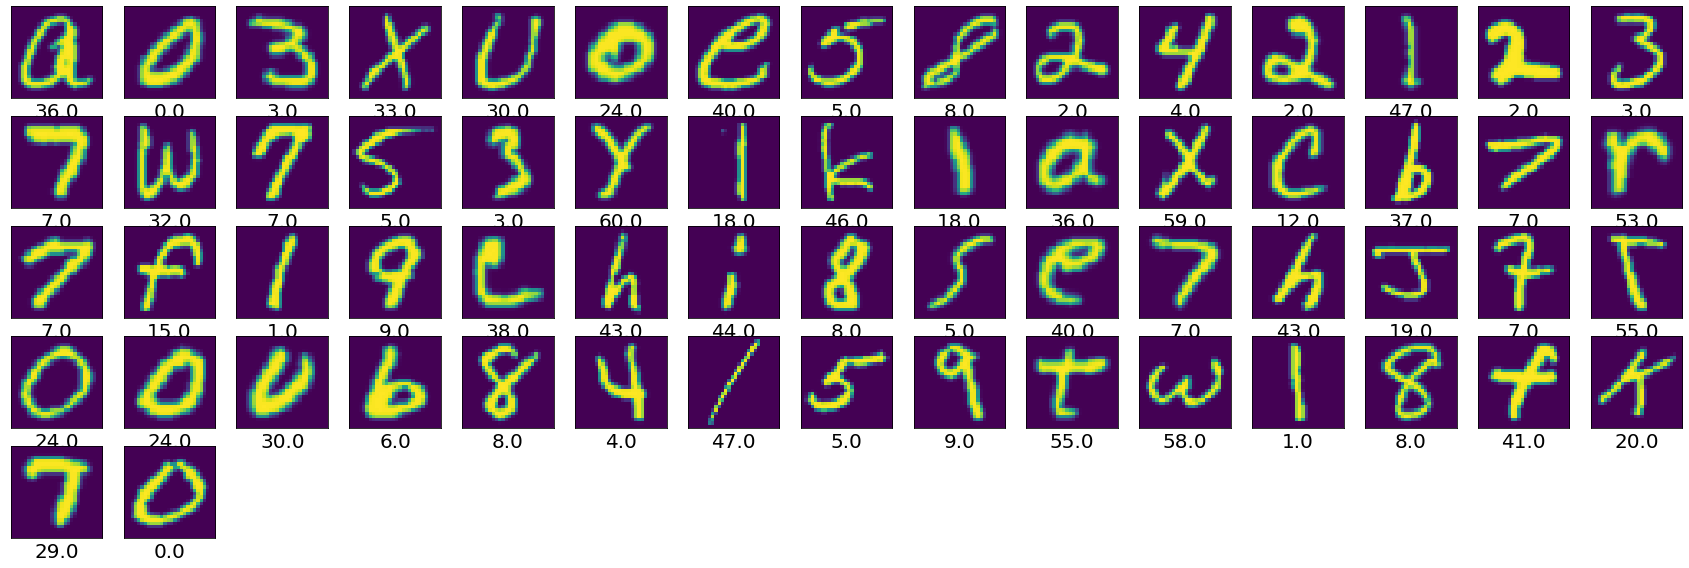

In [12]:
plt.figure(figsize=(30,30))
for i in range (0,62):
    plt.subplot(15,15,i+1)
    plt.imshow(df_np[i,1:].reshape(28,28))
    plt.xlabel(df_np[i,0],fontsize=20)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show;
    
##as we can see, the pictures are in disorder, so it´s very hard to find a pattern

In [13]:

df_np2=data.sort_values('e').to_numpy()


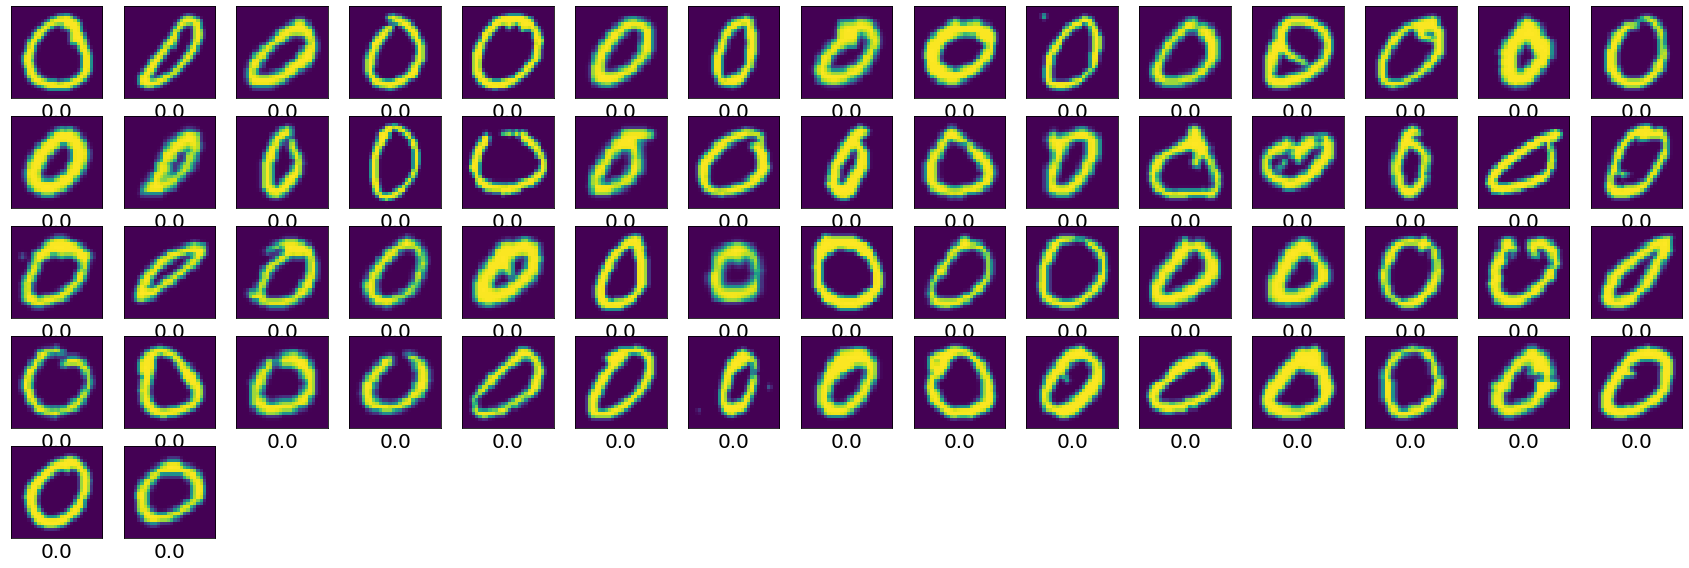

In [14]:
plt.figure(figsize=(30,30))
for i in range (0,62):
    plt.subplot(15,15,i+1)
    plt.imshow(df_np2[i,1:].reshape(28,28))
    plt.xlabel(df_np2[i,0],fontsize=20)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show;
##forgot about the duplicates of each value

In [15]:
data.drop_duplicates(subset='e', inplace=True)
df_np3=data.sort_values('e').to_numpy()


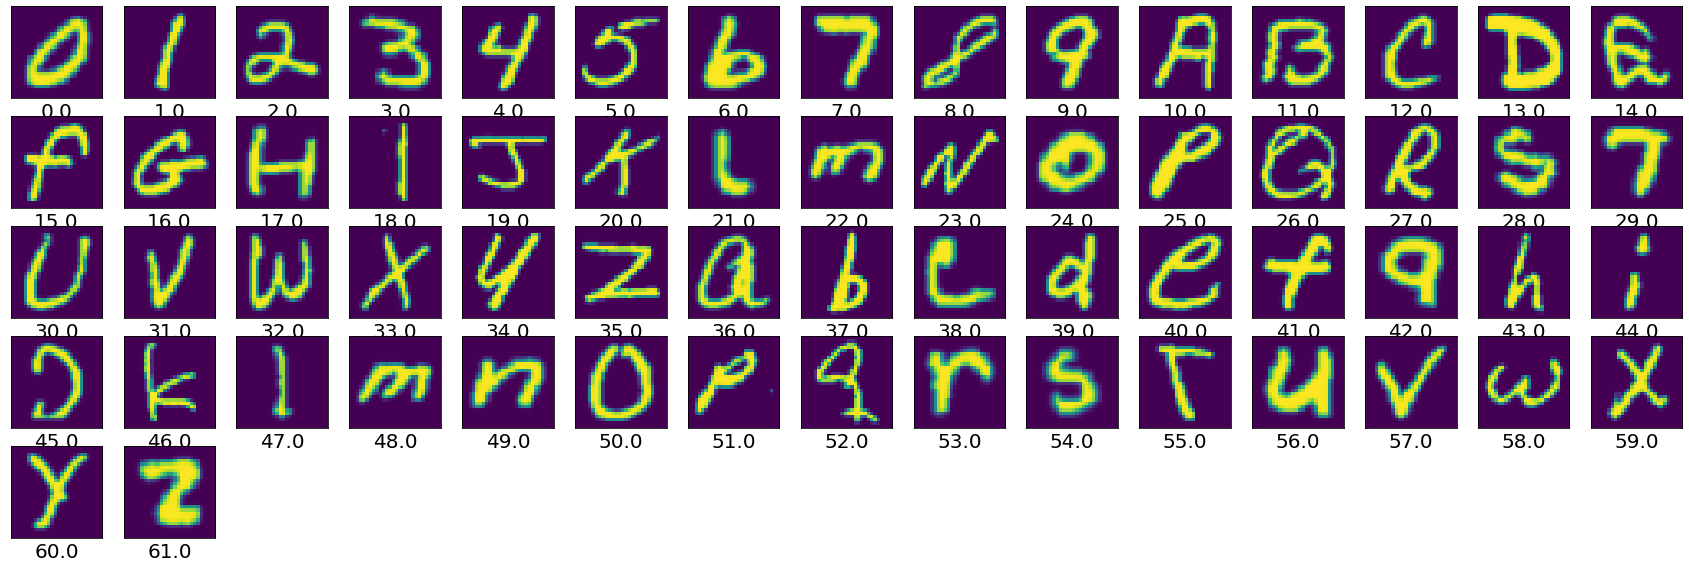

In [16]:
plt.figure(figsize=(30,30))
for i in range (0,62):
    plt.subplot(15,15,i+1)
    plt.imshow(df_np3[i,1:].reshape(28,28))
    plt.xlabel(df_np3[i,0],fontsize=20)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show;

In [17]:
##So now we can clearly see that:
##from 0 to 9: numbers
##form 10 to 35: upper case letters
##form 36 to 61: lower case letters

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 557
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 380.7 KB


In [19]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 696.7 MB


In [21]:
##def taken from class
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import GradientBoostingClassifier as GBC

from sklearn.linear_model import LogisticRegression as logreg
from sklearn.linear_model import SGDClassifier as SGDC
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.model_selection import train_test_split as tts
#from xgboost import XGBRegressor as XGBR    #Extreme Gradient Boosting
#from xgboost import XGBClassifier as XGBC
#from catboost import CatBoostClassifier as CATB
#from catboost import CatBoostRegressor as CTR     ##couldn´t install
from lightgbm import LGBMRegressor as LGBMR
from lightgbm import LGBMClassifier as LGBMC

lista_m=[logreg]
#lista_m = [logreg,KNNC,GBC,SGDC,GBR]
def modeling_testing(lista_modelos, dat):
    X_train, X_test, y_train, y_test = tts(dat.loc[:, dat.columns != 'e'], dat['e'])
    
    for i in lista_modelos:
        modelo = i()
        modelo.fit(X_train, y_train)
        train_score = modelo.score(X_train, y_train)
        test_score = modelo.score(X_test, y_test)
        print('Modelo:',str(i).split(sep = '.')[-1])
        print('Train score:', train_score,'\nTest score:',test_score,'\n')


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/__init__.py:42: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  warnings.warn("Starting from version 2.2.1, the library file in distribution wheels for macOS "


* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [22]:

upper = dat[(dat["e"]>=10)&(dat["e"]<=35)]

modeling_testing(lista_m,upper)

Modelo: LogisticRegression'>
Train score: 0.8929726050706143 
Test score: 0.8204670154395814 



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Try to do the same thing with lowercases.

In [23]:
%time
lower = dat[(dat["e"]>=36)]

modeling_testing(lista_m,lower)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
Modelo: LogisticRegression'>
Train score: 0.8503005814526461 
Test score: 0.7846267553584627 



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Try to do the same thing with numbers.

In [24]:
num = dat[(dat["e"]<=9)]

modeling_testing(lista_m,num)

Modelo: LogisticRegression'>
Train score: 0.9487545467102537 
Test score: 0.9284530386740332 



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
##Takes too long to run more than one model